In [1]:
import pandas as pd
# 1. 데이터 수집 및 확인
# Importing dataset
dataset = pd.read_csv("C:/dev/online_shoppers_intention/online_shoppers_intention.csv")
# Dataset Checking
print('shape: ',dataset.shape)
print(dataset.info())
print(dataset.describe())

# Columns
print(dataset.head(10))
features = list(dataset.columns)
print('features =', features)

shape:  (12330, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  Tr

In [2]:
# Handling missing data points
dataset.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

[False, True] [10422, 1908]


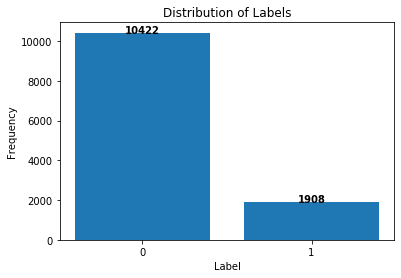

In [3]:
# Revenue Graph
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

labels = Counter(dataset['Revenue'])
revenue = list(labels.keys())
num = list(labels.values())
print(revenue, num)
plt.bar(revenue, num)
plt.xticks([0, 1])
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Distribution of Labels')
for i, v in enumerate(num):    # 수치 값 표시
    plt.text(i, v, str(v), ha='center', fontweight='bold')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

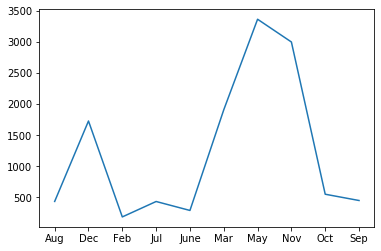

In [4]:
# 데이터 시각화
# 1) Revenue ~ Month
grouped = dataset['Revenue'].groupby(dataset['Month']).count()

# print(grouped.size())
plt.plot(grouped)
plt.show
# May, Dec 구입이 많은 달.

In [5]:
# 2. 데이터 전처리
# Handling catagorical data
# 1) object type - One Hot Encoding
df = dataset.copy()
month = pd.get_dummies(df['Month'])
df.drop('Month', axis=1, inplace=True)  # inplace=True: 반환받지 않고 기존 df이 변경되도록
df = pd.concat([df, month], axis=1)  # column bind

visitortype = pd.get_dummies(df['VisitorType'])
df.drop('VisitorType', axis=1, inplace=True)
df = pd.concat([df, visitortype], axis=1)

In [6]:
print(df.head())
print(df.columns)
print(df['May'].tail())

# 2) bool type - int type
df['Weekend'] = df['Weekend'].astype(int)
weekend = pd.get_dummies(df['Weekend'])
# df.drop('Weekend', axis=1, inplace=True)
df['Revenue'] = df['Revenue'].astype(int)
revenue = pd.get_dummies(df['Revenue'])
# df.drop('Revenue', axis=1, inplace=True)

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  ...  Jul  June  Mar  May  \
0         0.20       0.20         0.0         0.0  ...    0     0    0    0   
1         0.00       0.10         0.0         0.0  ...

In [14]:
print(df.describe())
print(df['Revenue'])

# 라벨을 맨 뒤로 보내기
df = df[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Aug', 'Dec', 'Feb', 'Jul', 'June', 'Mar', 'May', 'Nov',
       'Oct', 'Sep', 'New_Visitor', 'Other', 'Returning_Visitor', 'Revenue']]


       Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.00000

In [15]:
# 3. 데이터 모델링
# Train/Test Split
from sklearn.model_selection import train_test_split

X = df.iloc[:, :17]
Y = df.iloc[:, -1]
print('X shape:', X.shape)
print('Y shape:', Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state=123, shuffle=True)

print('X train shape:', X_train.shape)
print('X test shape:', X_test.shape)
print('Y train shape:', Y_train.shape)
print('Y test shape:', Y_test.shape)

X shape: (12330, 17)
Y shape: (12330,)
X train shape: (9864, 17)
X test shape: (2466, 17)
Y train shape: (9864,)
Y test shape: (2466,)


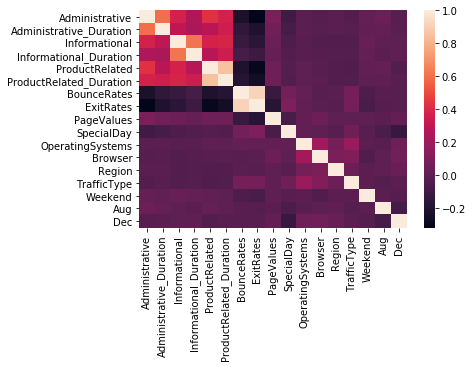

In [23]:
import seaborn as sns

# heatmap 그리기
# seaborn을 이용
cor = X.corr()
# print(cor)
sns.heatmap(cor)
# , xticklabels=cor.columns, yticklabels=cor.columns
plt.show()

In [9]:
# 독립변수들을 보고 구매로 이어지는지 / 그렇지 않은지 예측해보기
# 첫번째 방법은 지도학습 중 분류에 해당하는 Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
print(standardScaler.fit(X_train))

ValueError: could not convert string to float: 'May'